# Genetic Algorithm

Here I am going to use a genetic algorithm to solve the travelling salesman problem (TSP). I have implemented a probability based selection instead of tournament selection. Elitism is included in the algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define the city class that describes the nodes in the TSP
class City:
    # Positions of the city on the world
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    # Determine distance between a pair of cities 
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

# Determine the fitness of a given tour (individual in the population)
def sol_score(tour):
    total_distance = 0
    tmp = tour
    
    for index in tmp:
        if index != len(cities) - 1:
            total_distance += cities[int(index)].distance(cities[tmp[index+1]])
        else:
            total_distance += cities[int(index)].distance(cities[0])
        
    return total_distance

# Creates a random tour. Used to define the initial population
def create_tour(num_cities):
    tour = np.random.choice(num_cities, num_cities, replace = False)
    return tour

# Define the crossover between individuals using the ordered crossover approach. 
def crossover(tour1, tour2):
    index1 = np.ceil(len(tour1)*np.random.random())
    index2 = np.ceil(len(tour1)*np.random.random())
    
    # Start and finish index for the crossover 
    start = int(np.minimum(index1, index2))
    finish = int(np.maximum(index1, index2))
    
    # Copy desired segment
    parent1 = tour1[start:finish]
    
    # Fill the rest of the genome
    parent2 = []
    for city in tour2:
        if city not in parent1:
            parent2.append(city)
    offspring = np.concatenate([parent2[:start], parent1, parent2[int(finish-len(parent1)):]])
    
    return offspring

In [3]:
# Model parameters
generations = 250
pop_size = 250
num_cities = 100
mutation_rate = 0.02
elitism = 20

In [4]:
# Defining and initializing lists that are going to be used. 
cities = []
population = []

# Cities list
for city in range(num_cities):
    cities.append(City(10*np.random.rand(), 10*np.random.rand()))

# Initial population
for individual in range(pop_size):
    population.append(create_tour(num_cities))

# Tracks the evolution of the population
evolution = []

In [5]:
# Genetic Algorithm loop
for generation in range(generations):
    
    # Obtain fitness scores for the population
    fitness = []
    scores = []
    for tour in population:
        score = sol_score(tour)
        scores.append(score)
        fitness.append(1/score)
    
    # Record best fitness in the population
    evolution.append(np.min(scores))
    
    # Transform fitness so that it can be used as a probability
    fitness = list(fitness/np.sum(fitness))
    
    # Elitism - Select best indiviuals that will automatically go to the next generation
    elites = []
    indexes = np.argpartition(scores, elitism)[:elitism]
    for index in indexes:
        elites.append(population[index])
    
    # Selection - Pick individuals to breed based on their fitness
    tmp_pop = []
    selection = np.random.choice(pop_size, pop_size-elitism, p = fitness)
    for index in selection:
        tmp_pop.append(population[index])
    
    
    # Cross-Over - Breed selected individuals and generate their offsping
    offspring = []
    mates = np.random.choice(len(selection), len(selection), replace = False)
    for index in range(len(mates)-1):
        mate1 = tmp_pop[int(mates[index])]
        mate2 = tmp_pop[int(mates[index+1])]
        offspring.append(crossover(mate1, mate2))
        index += 1
        
    mates = np.random.choice(len(selection), 2, replace = False)
    offspring.append(crossover(tmp_pop[int(mates[0])], tmp_pop[int(mates[1])]))
    
    
    # Mutation - Randomly switch pairs of cities in a tour based on the mutation rate
    for index in range(len(offspring)):
        if np.random.rand() < mutation_rate:
            mutation_index1 = np.random.choice(len(offspring))
            mutation_index2 = np.random.choice(len(offspring))
            
            tmp_value =  offspring[mutation_index1]
            offspring[mutation_index1] = offspring[mutation_index2]
            offspring[mutation_index2] = tmp_value
            
    # Define the next generation
    population = np.concatenate([elites, offspring])
    population = population.astype(int)

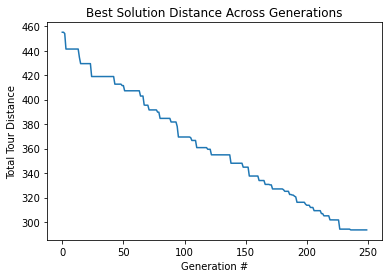

In [9]:
#Plot Results

plt.plot(evolution)
plt.title('Best Solution Distance Across Generations')
plt.xlabel('Generation #')
plt.ylabel('Total Tour Distance')
plt.savefig('Results.png')


As expected, we see strict improvement in the solution across generations because of elitism. We also see great improvement in the solution from the starting random population, with a reduction in total distance of about 30%.